## 请围绕我国国情，谈谈我国人工智能和计算机视觉的发展情况，并结合某个应用行业，分析计算机视觉的应用前景。

   我国在人工智能和计算机视觉领域取得了快速发展，我国政府高度重视人工智能，提出了一系列支持政策和发展规划，投入大量资金支持相关研究和产业发展，而且我国还拥有丰富的人才资源和科研机构，吸引了大量顶尖人才从事相关领域的研究与创新。同时，市场需求持续增长，促进了技术的商业化应用。在计算机视觉领域，中国企业在智能安防、智慧零售、医疗影像等领域取得了显著成就，推动了产业升级和创新发展。          
   然而，人工智能的发展不仅依赖于市场需求，还涉及算法、算力、工程和数据等多个要素。尽管我国拥有丰富的数据资源和人力资源来解决数据处理和清洗等问题，但算力仍然是一个短板。这个问题已经造成了不少教训，因为在短期内难以弥补芯片技术的不足。此外，发展通用人工智能还面临着另一个主要问题，即缺乏同时精通算法和工程实现的顶级人才。这类人才在理论和实践之间能够游刃有余，是推动人工智能发展的关键力量。因此，我国需要加大对人才培养和引进的支持力度，培养更多具备综合能力的人才，以推动人工智能技术的创新与应用。
   计算机视觉在医学影像分析领域具有巨大的应用前景，这一技术的发展已经在医学诊断和治疗中展现出了重要的作用，并有望进一步推动医学领域的进步。1. 自动化诊断与辅助诊断：计算机视觉技术能够对医学影像进行快速、精准的分析，辅助医生进行疾病诊断。例如，在X光、CT和MRI等影像中，计算机视觉可以帮助检测和识别病变、肿瘤、血管异常等，并提供辅助诊断建议，提高诊断的准确性和效率。
2. 病灶分割与定位： 计算机视觉技术可以对医学影像中的病灶进行分割和定位，帮助医生更好地了解病变的范围和位置，为手术规划和治疗方案制定提供重要参考。3. 智能影像导航与手术辅助： 结合增强现实（AR）和虚拟现实（VR）技术，计算机视觉可以提供智能影像导航和手术辅助，帮助医生在手术过程中精确定位和处理病灶，降低手术风险和提高手术成功率。4. 疾病预测与个性化治疗：基于大数据和机器学习技术，计算机视觉可以分析医学影像和临床数据，预测疾病的发展趋势和治疗效果，为患者提供个性化的治疗方案和健康管理建议。5. 医学研究与科学探索： 计算机视觉技术为医学研究提供了强大的工具，可以帮助科学家分析和理解医学影像中的复杂结构和生理过程，推动医学科学的进步和创新


### 将彩色图像转换为灰度图像

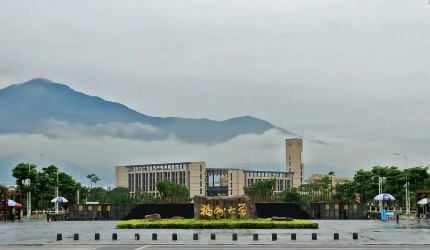

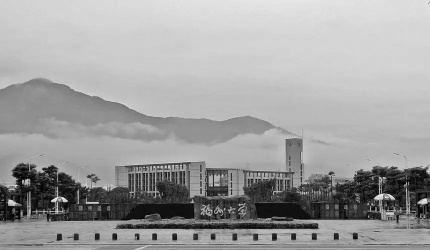

In [1]:
import cv2
import numpy as np
from IPython.display import display, Image

if __name__ == "__main__":
    img_path = "fzu.webp"
    img = cv2.imread(img_path)
    # 将图片缩小便于显示观看（双线性插值）
    img_resize = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

    # 将图片转为灰度图
    img_gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)

    # 展示原始图片
    display(Image(data=cv2.imencode('.jpg', img_resize)[1].tobytes(), width=800, height=600))

    # 展示灰度图
    display(Image(data=cv2.imencode('.jpg', img_gray)[1].tobytes(), width=800, height=600))

### 编程实现将RGB图像转换为CIE-XYZ图像

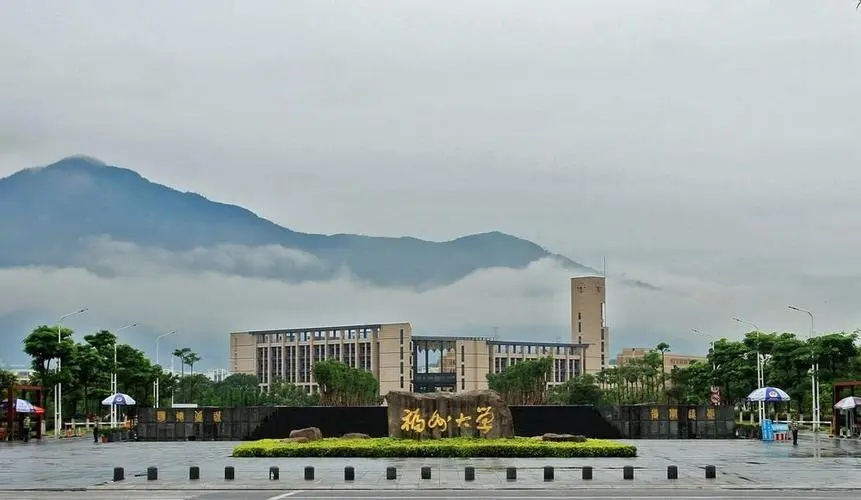

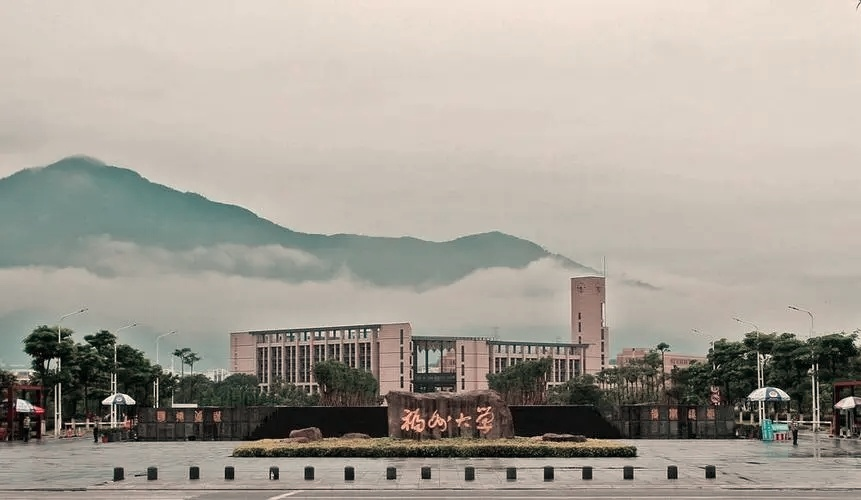

In [2]:
import cv2
import numpy as np
from IPython.display import display, Image

def rgb_to_xyz(rgb_image):
    # 将RGB图像转换为浮点数类型
    rgb_image = rgb_image.astype(np.float32) / 255.0

    # 定义RGB到XYZ的转换矩阵
    # m = np.array([[0.49, 0.31, 0.jpg2],
    #               [0.17697, 0.8124, 0.01063],
    #               [0, 0.01, 0.99]])
    # m /= 0.17697
    m = np.array([[0.4124, 0.3576, 0.1805],
              [0.2126, 0.7152, 0.0722],
              [0.0193, 0.1192, 0.9505]])
    # RGB到XYZ的转换
    xyz_image = np.dot(rgb_image.reshape(-1, 3), m.T).reshape(rgb_image.shape)

    xyz_image = np.clip(xyz_image * 255, 0, 255).astype(np.uint8)
    
    return xyz_image

if __name__ == "__main__":
    # 读取RGB图像
    rgb_image = cv2.imread("fzu.webp")
    
    # 将RGB图像转换为XYZ图像
    xyz_image = rgb_to_xyz(rgb_image)

    # 保存XYZ图像
    cv2.imwrite("xyz_image.jpg", xyz_image)
    display(Image(data=cv2.imencode('.jpg', rgb_image)[1].tobytes(), width=800, height=600))
    display(Image(data=cv2.imencode('.jpg', xyz_image)[1].tobytes(), width=800, height=600))

### 编程实现该图像的0范数、1范数、2范数和无穷范数

In [3]:
import cv2
import numpy as np

def image_norms(image):
    # 将图像转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 计算图像的0范数
    zero_norm = np.count_nonzero(gray_image)

    # 计算图像的1范数
    one_norm = np.sum(gray_image)

    # 计算图像的2范数
    two_norm = np.linalg.norm(gray_image)

    # 计算图像的无穷范数
    inf_norm = np.max(gray_image)

    return zero_norm, one_norm, two_norm, inf_norm

if __name__ == "__main__":
    # 读取图像
    image = cv2.imread("fzu.webp")

    # 计算图像的范数
    zero_norm, one_norm, two_norm, inf_norm = image_norms(image)

    # 打印结果
    print("0范数:", zero_norm)
    print("1范数:", one_norm)
    print("2范数:", two_norm)
    print("无穷范数:", inf_norm)


0范数: 430366
1范数: 68165212
2范数: 110503.03896273623
无穷范数: 253


### 通过高斯算子，构建图像的4个尺度的表达

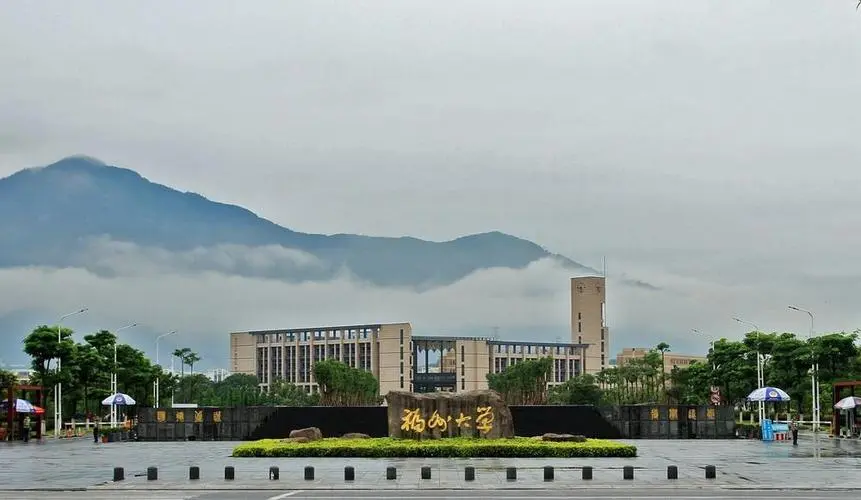

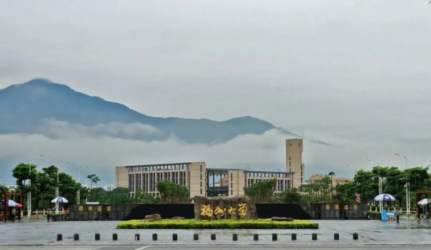

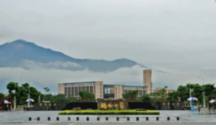

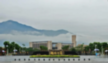

In [4]:
import cv2
from PIL import Image
from IPython.display import display
import numpy as np

if __name__ == "__main__":
    # 读取图像
    image = cv2.imread("fzu.webp")

    # 构建高斯金字塔
    pyramid = []
    pyramid.append(image)
    for i in range(3):
        image = cv2.pyrDown(image)
        pyramid.append(image)

    # 显示结果
    for i, level in enumerate(pyramid):
        # 将OpenCV图像转换为PIL图像
        pil_image = Image.fromarray(cv2.cvtColor(level, cv2.COLOR_BGR2RGB))
        # 在Jupyter Notebook中显示图像
        display(pil_image)
